In [220]:
import itertools

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [221]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [222]:
def check_none(_df):
    _none_values = _df.isnull().sum()
    _total_values = _df.count()
    return pd.concat([_none_values, _total_values], axis=1, keys=['none_values', 'total_values'])


df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
check_none(_df=df)

,none_values,total_values
Survived,0,891
Pclass,0,891
Sex,0,891
Age,177,714
SibSp,0,891
Parch,0,891
Fare,0,891
Cabin,687,204
Embarked,2,889


Заметим, что колонка `Embarked` содержит два NaN'а, отбросим их, а вот для колонки `Age` так сделать нельзя, слишком много данных потеряем, наша будущая модель будет ошибаться, обработаем эту колонку в последующих этапах. С колонкой `Cabin` поступим жесткого, удалим полностью, слишком мало данных в ней содержится.

In [223]:
df.drop(columns=['Cabin'], inplace=True)
df.dropna(subset=['Embarked'], inplace=True)
df.head()
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Распределим колонки на категориальные и целочисленные переменные. Заметим выше некую статистику по данным, все звучит валидно.(рассказать, что мы тут можем понять)

In [224]:
df_numerical = ['Age', 'SibSp', 'Parch', 'Fare']
df_categorical = ['Survived', 'Pclass', 'Sex', 'Embarked']

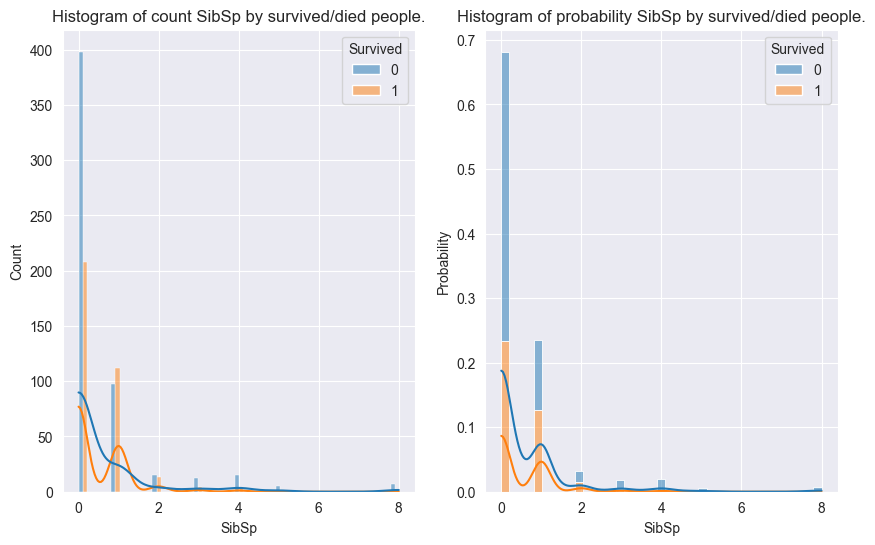

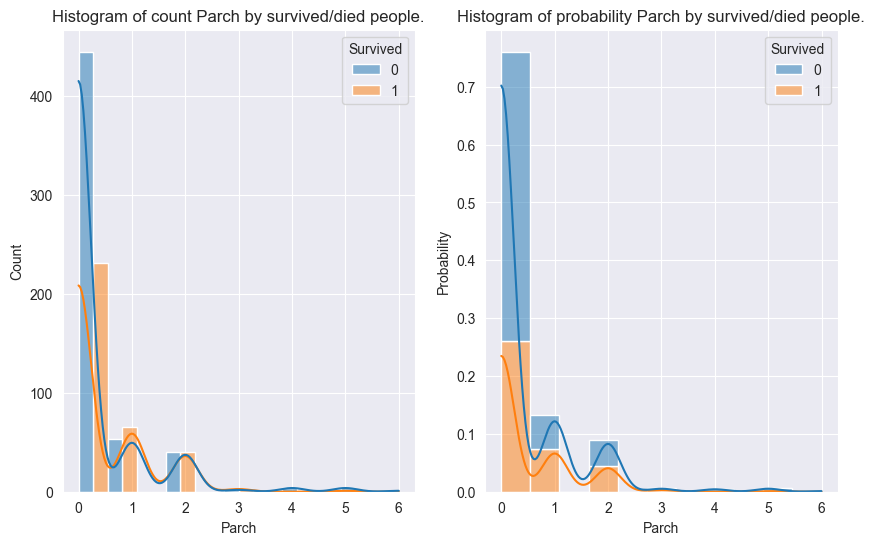

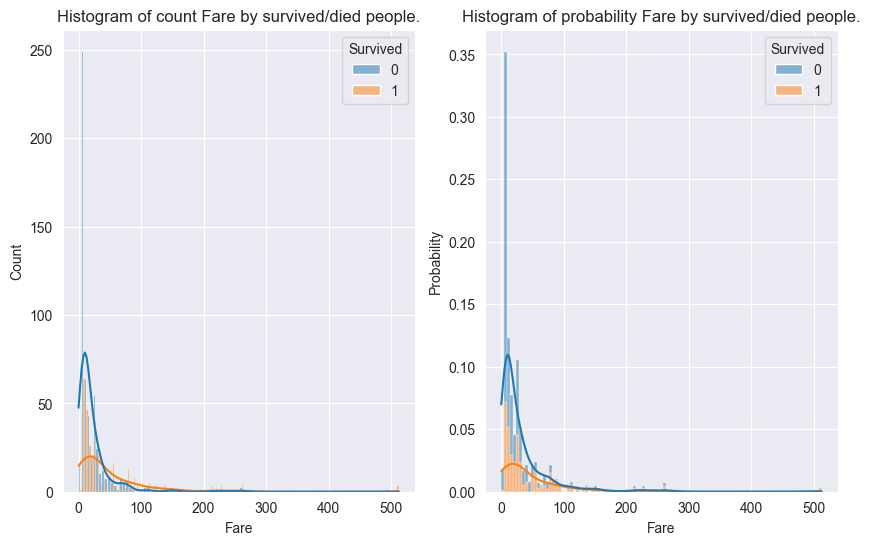

In [255]:
def draw_hist_numerical(_df, _column):
    _fig, _ax = plt.subplots(1, 2, figsize=(10, 6))
    sns.histplot(data=_df, x=_column, kde=True, hue='Survived', multiple='dodge', stat='count', discrete=False,
                 ax=_ax[0])
    sns.histplot(data=_df, x=_column, kde=True, hue='Survived', multiple='stack', stat='probability', ax=_ax[1])
    _ax[0].set_title(f'Histogram of count {_column} by survived/died people.')
    _ax[1].set_title(f'Histogram of probability {_column} by survived/died people.')


for column in df_numerical:
    draw_hist_numerical(df, column)

По данным гистограммам зафиксируем наблюдения.
Дети выживали чаще, чем взрослые.
Большинство людей путешествовало в одиночку.
Наибольшее количество людей умерло, имея при себе дешевый билет.
И так можно рассуждать дальше, искать связи между колонками(корреляция -> будет позже)

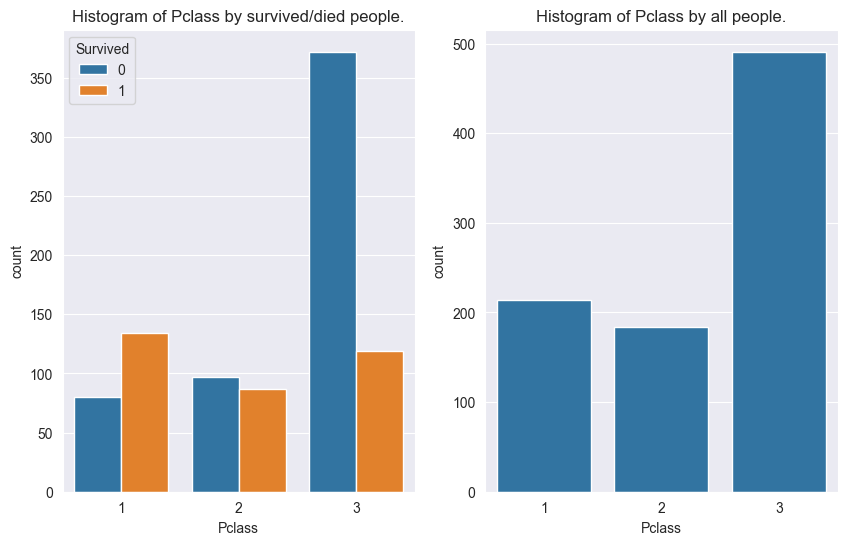

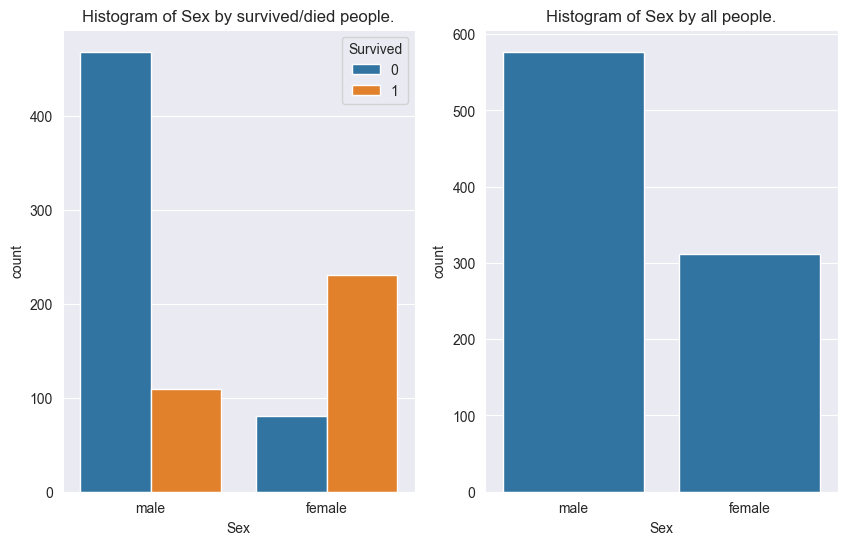

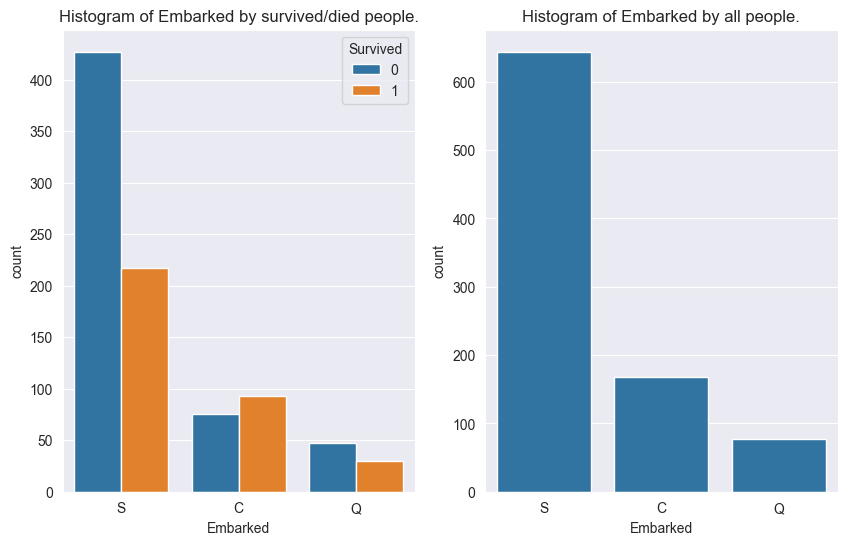

In [226]:
def draw_hist_categorical(_df, _column):
    if _column == 'Survived':
        return
    _fig, _ax = plt.subplots(1, 2, figsize=(10, 6))
    sns.countplot(data=_df, x=_column, hue="Survived", ax=_ax[0])
    sns.countplot(data=_df, x=_column, legend=False, ax=_ax[1])
    _ax[0].set_title(f"Histogram of {_column} by survived/died people.")
    _ax[1].set_title(f"Histogram of {_column} by all people.")


for column in df_categorical:
    draw_hist_categorical(df, column)


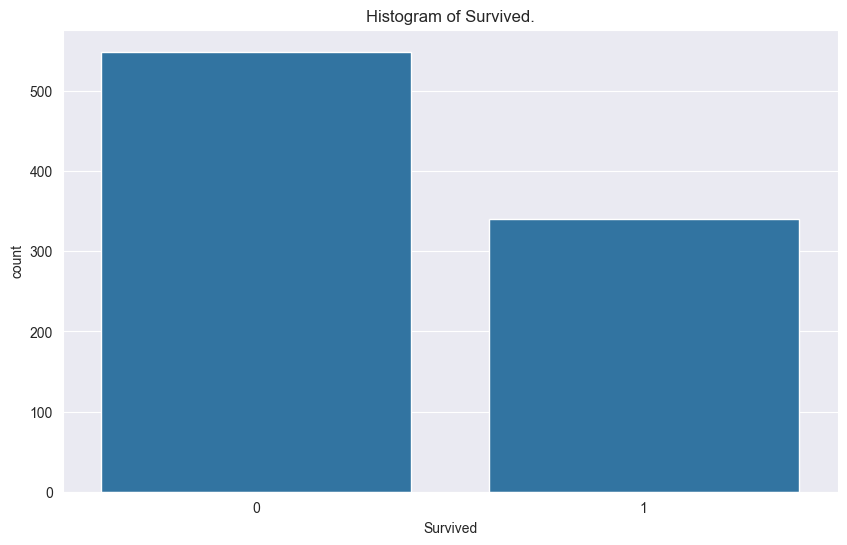

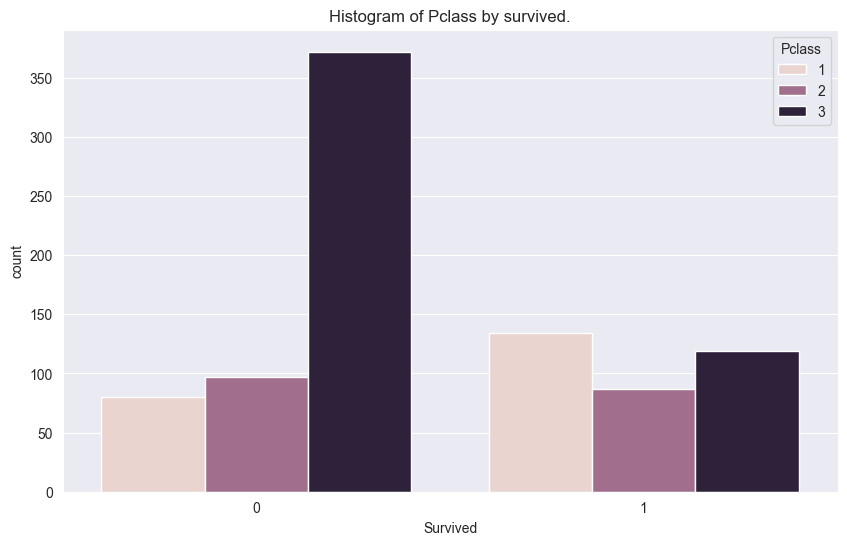

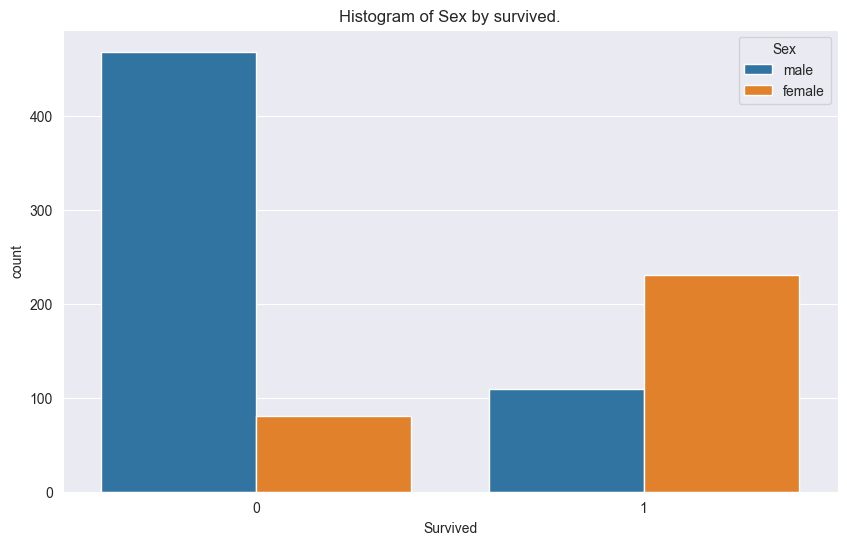

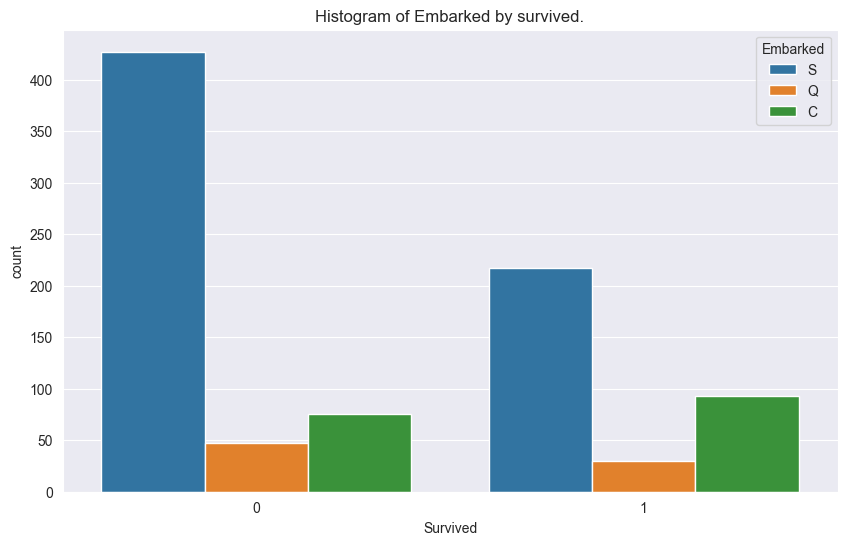

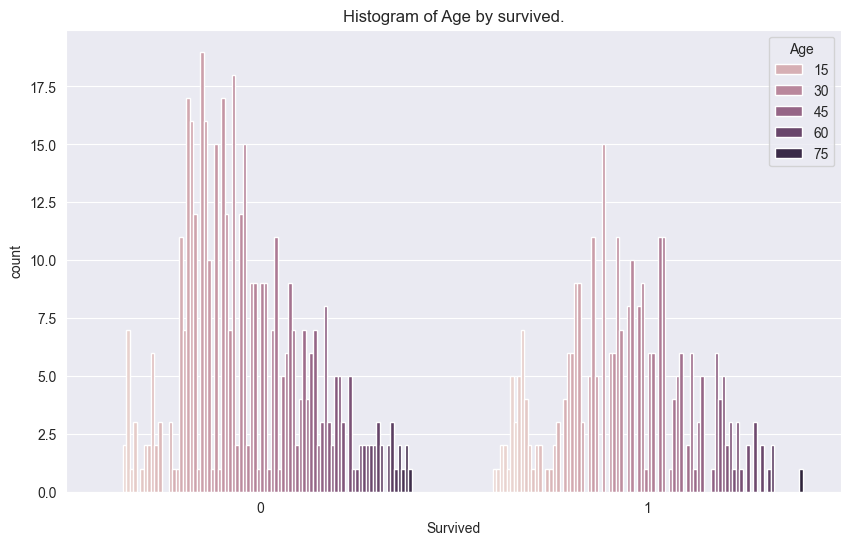

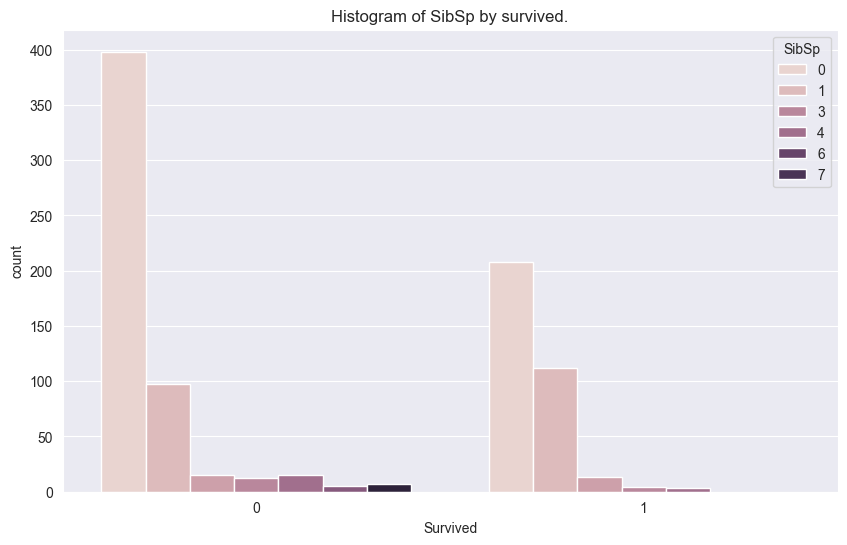

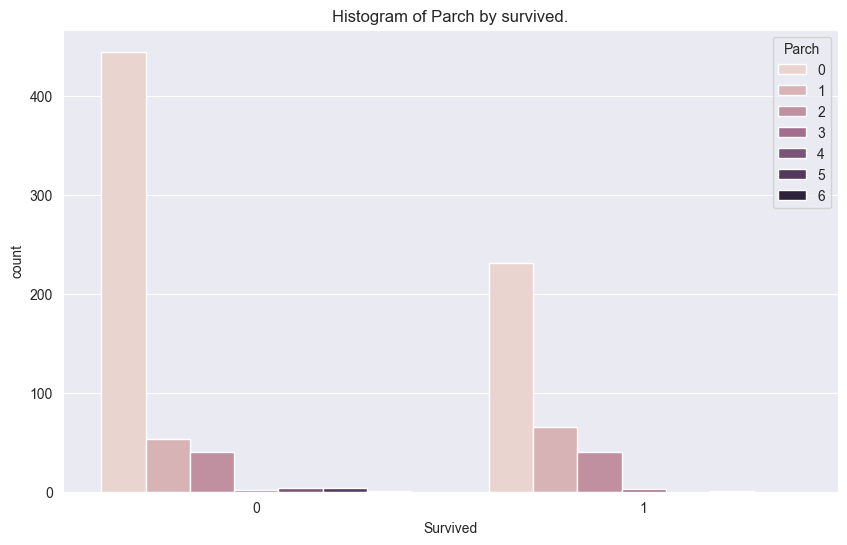

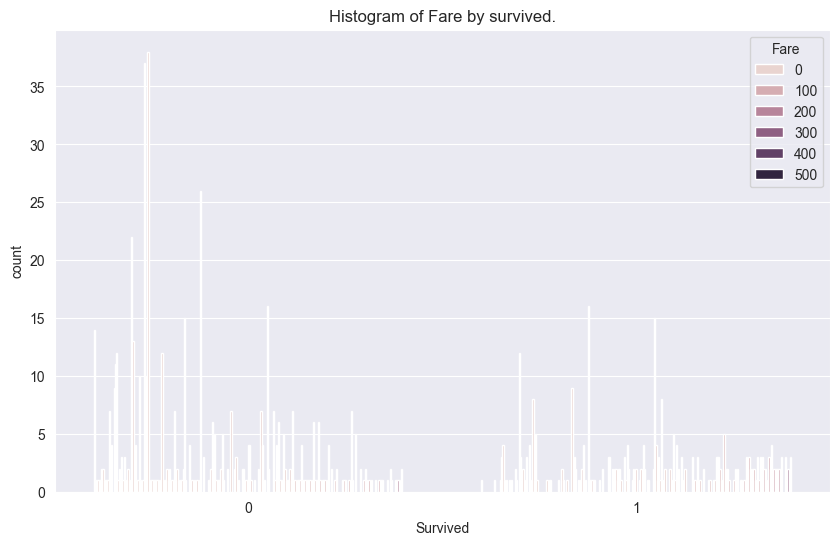

In [227]:
def draw_survived_depends(_df, _column):
    _fig, _ax = plt.subplots(figsize=(10, 6))
    if _column == 'Survived':
        sns.countplot(data=_df, x=_column)
        _ax.set_title(f"Histogram of Survived.")
    else:
        sns.countplot(data=_df, x='Survived', hue=_column)
        _ax.set_title(f"Histogram of {_column} by survived.")


for column in itertools.chain(df_categorical, df_numerical):
    draw_survived_depends(df, column)


Text(0.5, 0.98, 'Pair features dependencies')

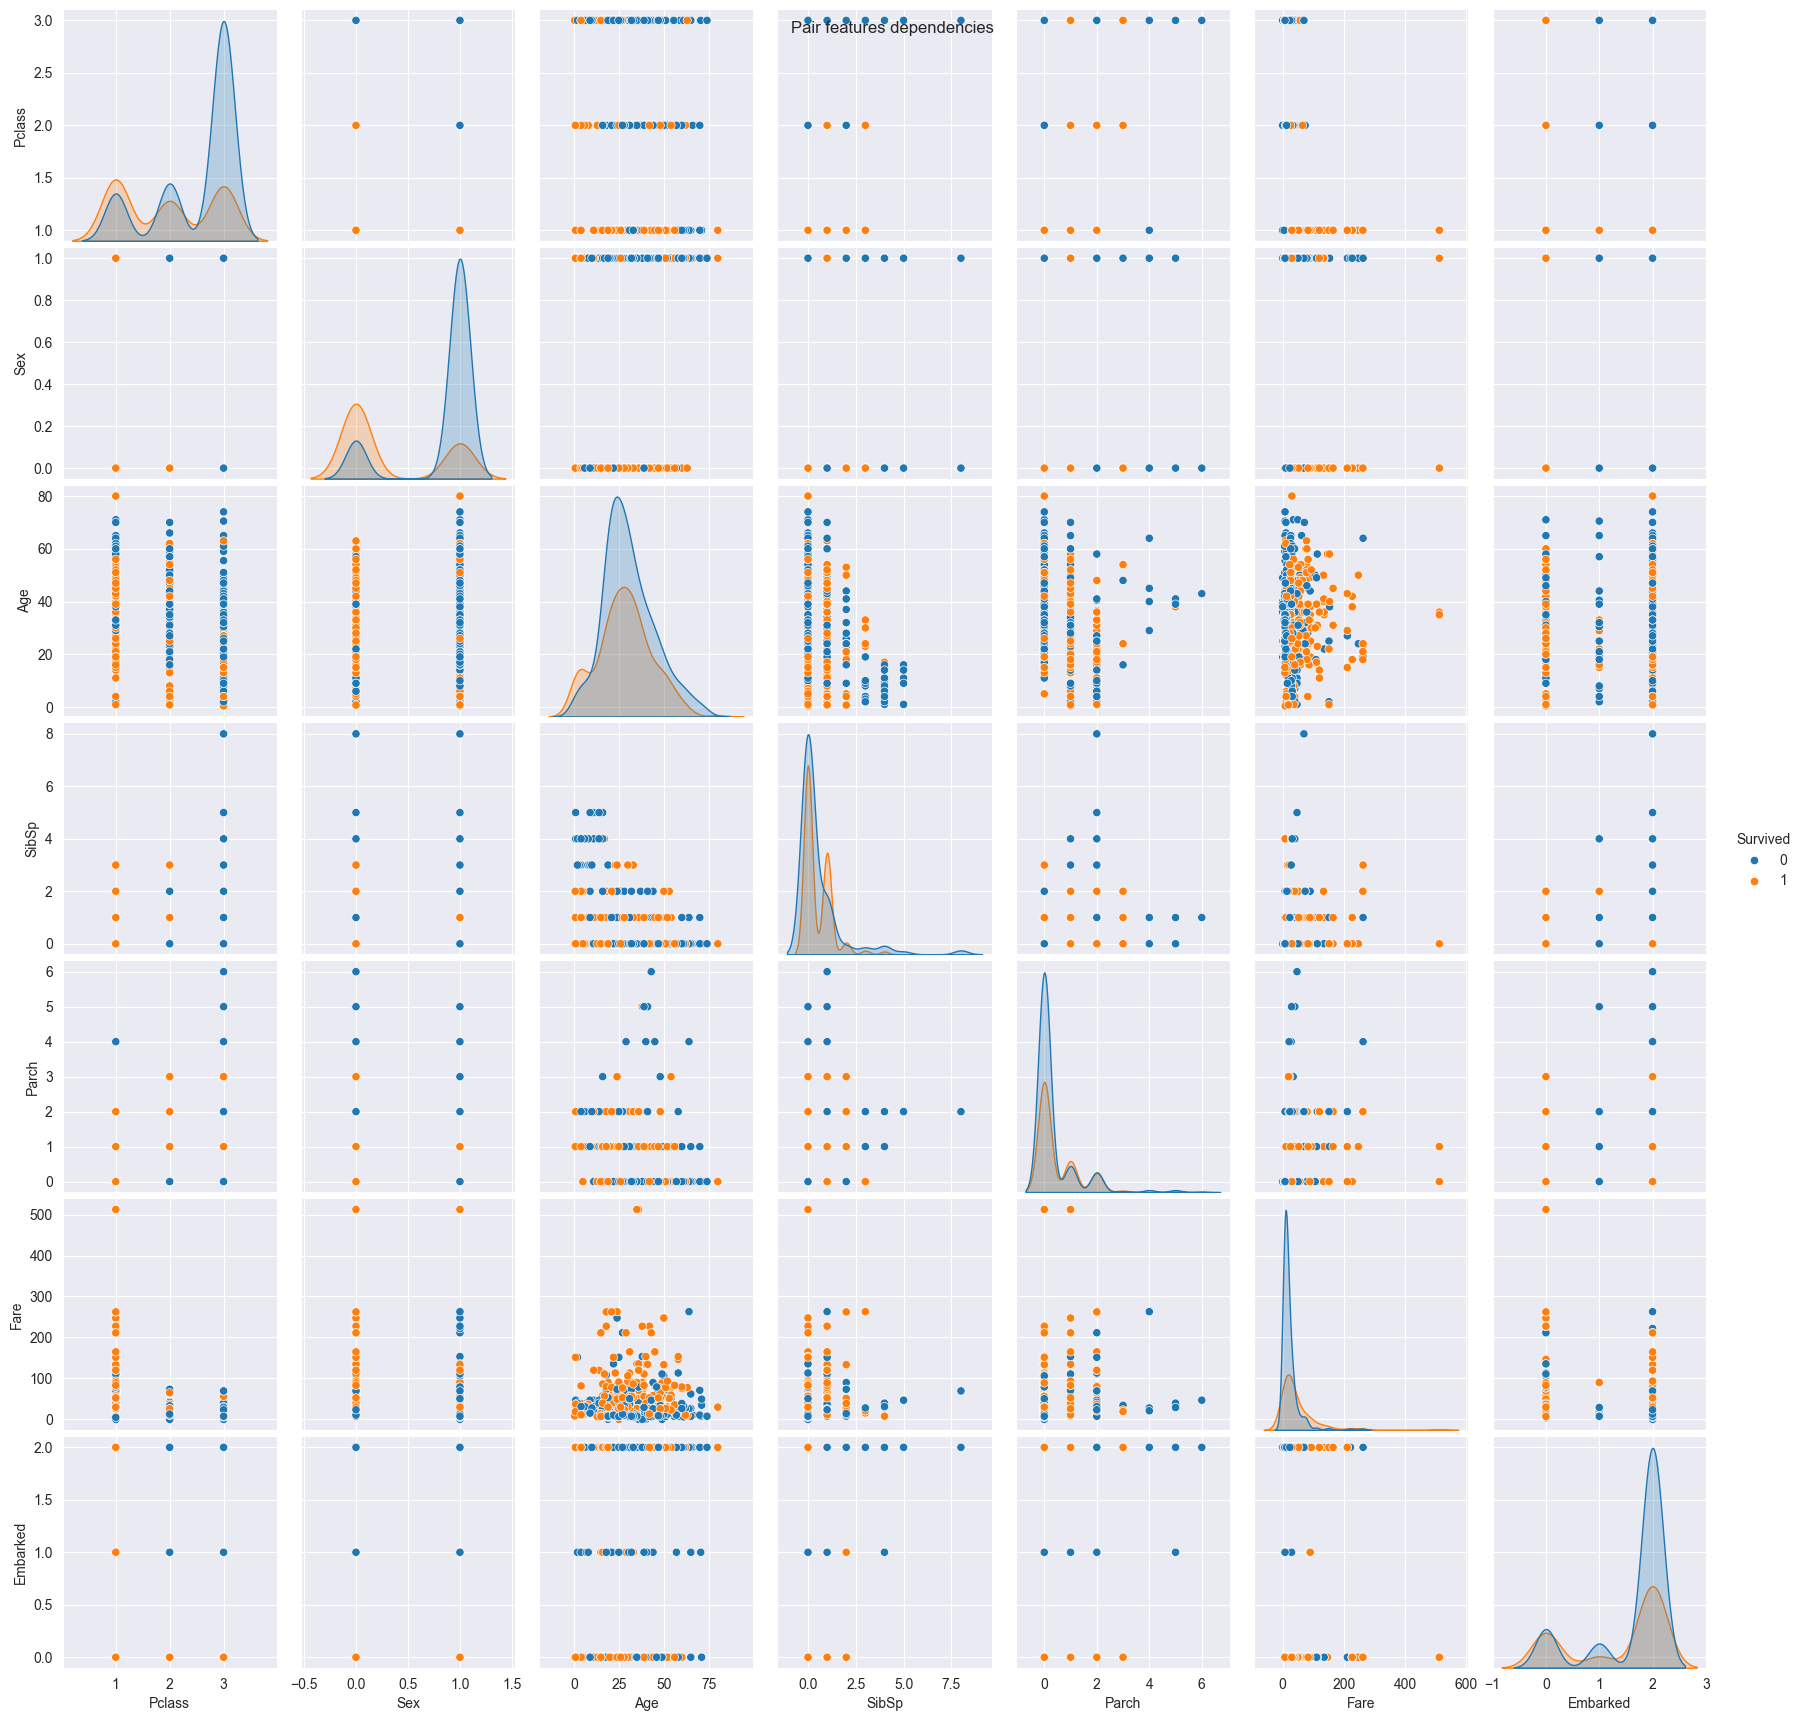

In [228]:
_le = LabelEncoder()
for column in ['Sex', 'Embarked']:
    df[column] = _le.fit_transform(df[column])

pair_plot = sns.pairplot(df, hue='Survived')
pair_plot.fig.suptitle('Pair features dependencies')

Class: 3
----------------------------------------------------------------------------------------
probability_survive: 0.24236252545824846
mean_age: 25.14061971830986
mean_fare: 13.675550101832993
mean_parch: 0.39307535641547864
mean_SibSp: 0.615071283095723


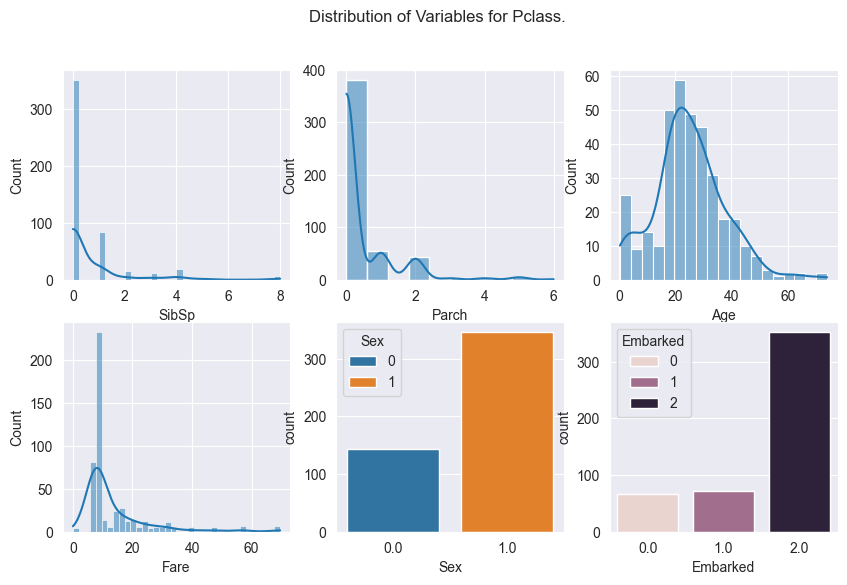

Class: 1
----------------------------------------------------------------------------------------
probability_survive: 0.6261682242990654
mean_age: 38.10554347826087
mean_fare: 84.19351635514018
mean_parch: 0.3598130841121495
mean_SibSp: 0.4205607476635514


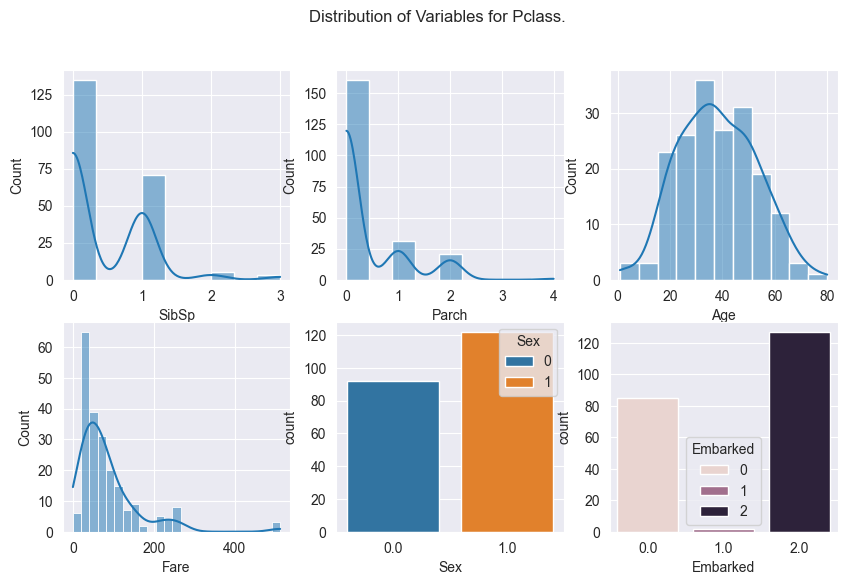

Class: 2
----------------------------------------------------------------------------------------
probability_survive: 0.47282608695652173
mean_age: 29.87763005780347
mean_fare: 20.662183152173913
mean_parch: 0.3804347826086957
mean_SibSp: 0.40217391304347827


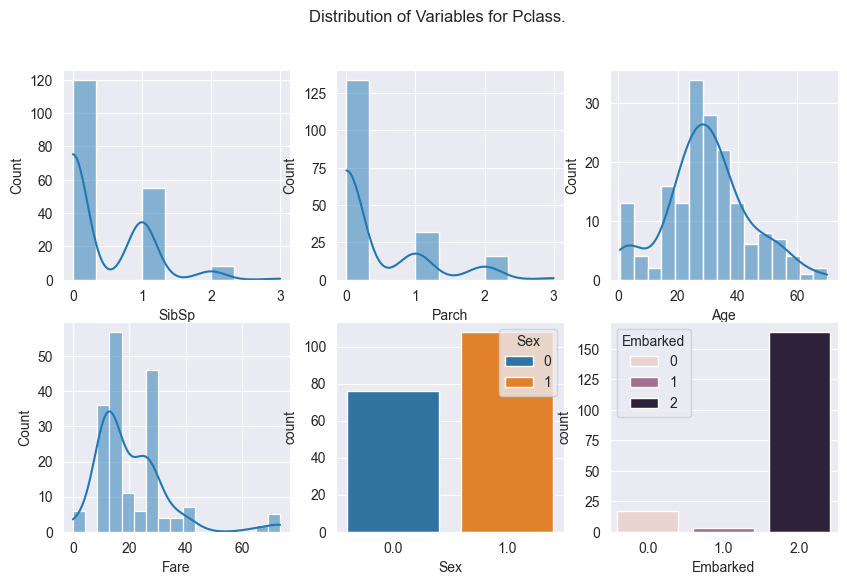

In [229]:
def plot_by_pclass(_df, _cur_class):
    _fig, _ax = plt.subplots(2, 3, figsize=(10, 6))
    _fig.suptitle(f'Distribution of Variables for Pclass.')
    _ax = _ax.flatten()
    _last_ax = 0
    for i, _column in enumerate(df_numerical):
        sns.histplot(_df[_cur_class][_column].dropna(), kde=True, ax=_ax[i])
        _last_ax = i

    for i, _column in enumerate(df_categorical):
        sns.countplot(x=_column, data=_df[_cur_class], hue=_df[_column], ax=_ax[i + _last_ax + 1])

    calc_stats(_df, _cur_class)
    plt.show()


def calc_stats(_df, _cur_class):
    print("-" * 88)
    _probability = _df[_cur_class]['Survived'].mean()
    print(f'probability_survive: {_probability}')
    _mean_age = _df[_cur_class]['Age'].mean()
    print(f'mean_age: {_mean_age}')
    _mean_fare = _df[_cur_class]['Fare'].mean()
    print(f'mean_fare: {_mean_fare}')
    _mean_parch = _df[_cur_class]['Parch'].mean()
    print(f'mean_parch: {_mean_parch}')
    _mean_sibsp = _df[_cur_class]['SibSp'].mean()
    print(f'mean_SibSp: {_mean_sibsp}')


df_numerical = ["SibSp", "Parch", "Age", "Fare"]
df_categorical = ["Sex", "Embarked"]

for value in df['Pclass'].unique():
    print(f'Class: {value}')
    plot_by_pclass(df, df['Pclass'] == value)

AgeGroup: 21-35
----------------------------------------------------------------------------------------
probability_survive: 0.40955631399317405
mean_age: 28.059726962457336
mean_fare: 31.135009556313996
mean_parch: 0.22525597269624573
mean_SibSp: 0.3310580204778157


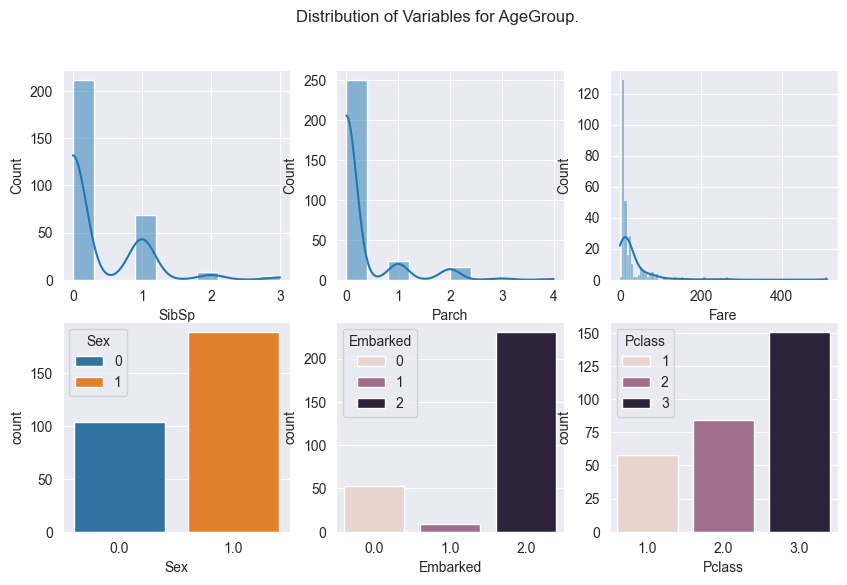

AgeGroup: 35-55
----------------------------------------------------------------------------------------
probability_survive: 0.3977272727272727
mean_age: 43.53693181818182
mean_fare: 43.3725625
mean_parch: 0.5056818181818182
mean_SibSp: 0.39204545454545453


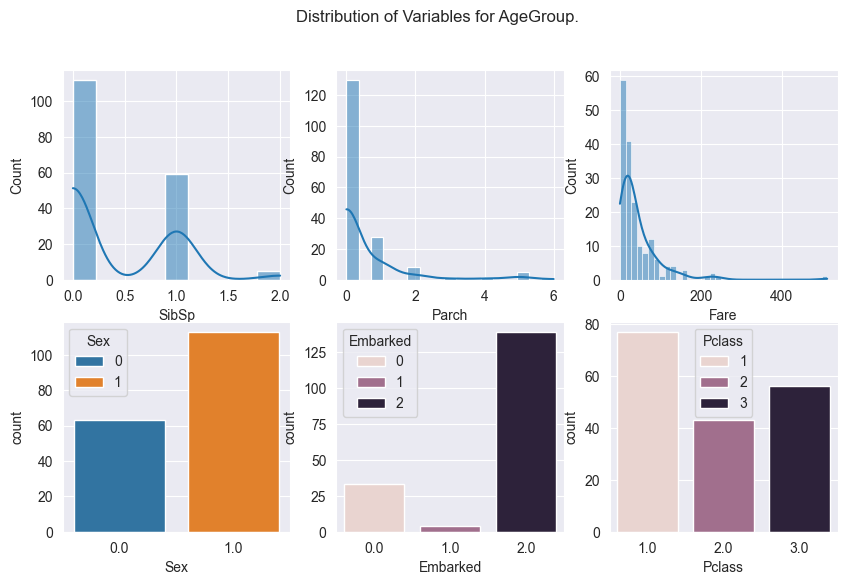

AgeGroup: <14
----------------------------------------------------------------------------------------
probability_survive: 0.5844155844155844
mean_age: 5.703506493506493
mean_fare: 31.928463636363638
mean_parch: 1.3376623376623376
mean_SibSp: 1.8311688311688312


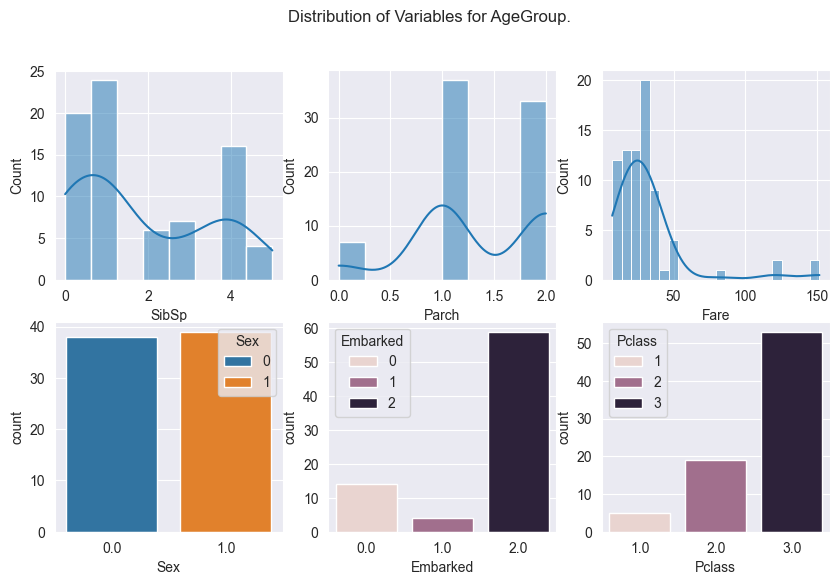

AgeGroup: >55
----------------------------------------------------------------------------------------
probability_survive: 0.28205128205128205
mean_age: 62.35897435897436
mean_fare: 44.800746153846156
mean_parch: 0.3076923076923077
mean_SibSp: 0.15384615384615385


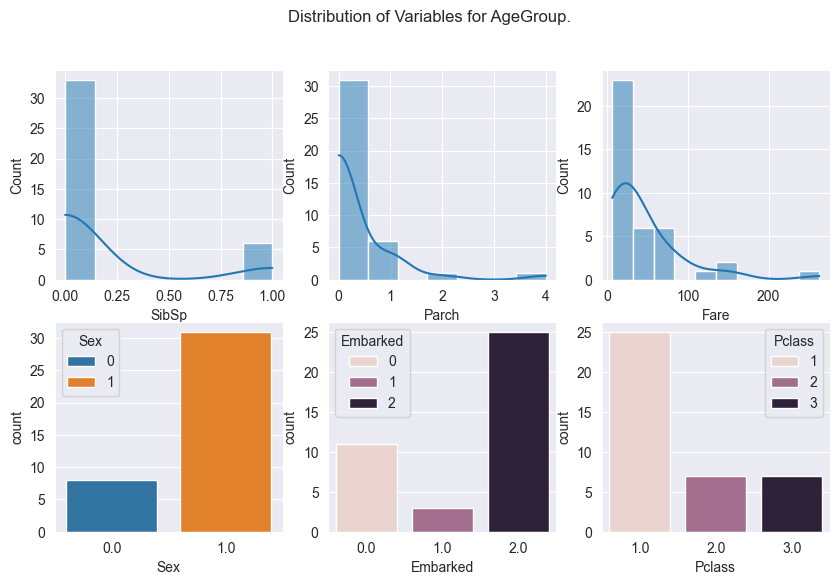

AgeGroup: 14-21
----------------------------------------------------------------------------------------
probability_survive: 0.33070866141732286
mean_age: 18.503937007874015
mean_fare: 28.740420472440942
mean_parch: 0.2992125984251969
mean_SibSp: 0.41732283464566927


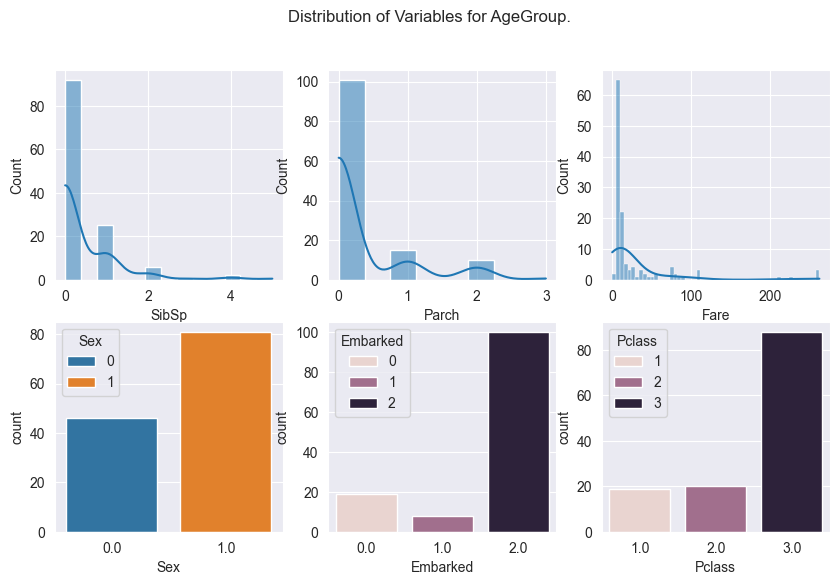

In [230]:
def plot_by_age_group(_df, _cur_class):
    _fig, _ax = plt.subplots(2, 3, figsize=(10, 6))
    _fig.suptitle(f'Distribution of Variables for AgeGroup.')
    _ax = _ax.flatten()
    _last_ax = 0
    for i, _column in enumerate(df_numerical):
        sns.histplot(_df[_cur_class][_column].dropna(), kde=True, ax=_ax[i])
        _last_ax = i

    for i, _column in enumerate(df_categorical):
        sns.countplot(x=_column, data=_df[_cur_class], hue=_df[_column], ax=_ax[i + _last_ax + 1])

    calc_stats(_df, _cur_class)
    plt.show()


def calc_stats(_df, _cur_class):
    print("-" * 88)
    probability = _df[_cur_class]['Survived'].mean()
    print(f'probability_survive: {probability}')
    mean_age = _df[_cur_class]['Age'].mean()
    print(f'mean_age: {mean_age}')
    mean_fare = _df[_cur_class]['Fare'].mean()
    print(f'mean_fare: {mean_fare}')
    mean_parch = _df[_cur_class]['Parch'].mean()
    print(f'mean_parch: {mean_parch}')
    mean_sibsp = _df[_cur_class]['SibSp'].mean()
    print(f'mean_SibSp: {mean_sibsp}')


df_numerical = ["SibSp", "Parch", "Fare"]
df_categorical = ["Sex", "Embarked", "Pclass"]
values = [0, 14, 21, 35, 55, 81]
keys = ['<14', '14-21', '21-35', '35-55', '>55']
df['AgeGroup'] = pd.cut(df['Age'], bins=values, labels=keys, right=True)

for value in df['AgeGroup'].unique():
    if pd.isnull(value):
        continue
    print(f'AgeGroup: {value}')
    plot_by_age_group(df, df['AgeGroup'] == value)

Text(0.5, 1.05, 'Corr')

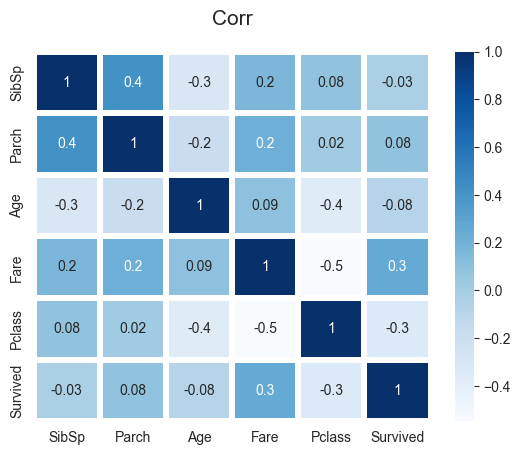

In [231]:
corr = df[["SibSp", "Parch", "Age", "Fare", "Pclass", 'Survived']].corr()
f, ax = plt.subplots()
sns.heatmap(corr, annot=True, linewidths=3, cmap='Blues', fmt='.1g')
plt.title("Corr", y=1.05, size=15)

In [250]:
def load_data():
    _df = pd.read_csv('train.csv')
    return _df


def prepare_data(_df, _predict_param):
    _df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

    add_mean_age()

    _df.dropna(inplace=True)

    cast_to_numeric(_df)

    _X_test, _X_train, y_test, y_train = split_data(_df, _predict_param)

    _sc = StandardScaler()
    _X_train_scaled = _sc.fit_transform(_X_train)
    _X_test_scaled = _sc.transform(_X_test)
    return _X_train_scaled, _X_test_scaled, y_train, y_test


def split_data(_df, _predict_param):
    _X = _df.drop(columns=[_predict_param])
    _y = _df[_predict_param]
    _X_train, _X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.2)
    return _X_test, _X_train, y_test, y_train


def cast_to_numeric(_df):
    _le = LabelEncoder()
    for _column in ['Sex', 'Embarked']:
        _df[_column] = _le.fit_transform(_df[_column])


def add_mean_age():
    mean_age = df['Age'].mean()
    print(mean_age)
    df['Age'] = df['Age'].fillna(mean_age)


def train_model(_X_train, _X_test, _y_train, _y_test):
    _models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC()
    }

    _results = {}
    for _model_name, _model in _models.items():
        _model.fit(_X_train, _y_train)
        _y_pred = _model.predict(_X_test)
        _accuracy = accuracy_score(_y_test, _y_pred)
        _results[_model_name] = _accuracy
        print(_y_pred)
    return _results


In [253]:
def get_result(_cur_column):
    _df = load_data()
    _X_train, _X_test, y_train, y_test = prepare_data(_df, _cur_column)
    model_results = train_model(_X_train, _X_test, y_train, y_test)
    return model_results


print(f'Pclass prediction')
get_result('Pclass')


Pclass prediction
29.642092696629216
[1 3 3 3 3 3 1 3 2 3 1 3 3 3 2 3 3 1 2 1 3 3 3 3 3 3 2 3 3 3 3 3 1 3 3 3 3
 3 3 2 1 2 2 2 3 3 3 1 3 3 3 3 3 1 2 3 3 1 3 1 1 3 1 3 3 2 1 3 3 1 3 1 3 3
 3 1 3 1 3 3 3 1 3 3 3 3 1 3 3 3 1 3 2 3 3 2 1 1 3 3 3 1 3 1 3 3 2 1 3 3 3
 2 3 1 3 2 1 3 3 3 1 1 3 3 3 3 1 3 1 2 1 3 3 3 3 1 1 3 3 3 3 3 3]
[1 3 3 2 3 3 1 3 1 3 1 3 3 2 1 3 3 1 2 2 3 3 3 3 1 3 2 3 3 3 3 3 1 2 3 3 3
 2 2 2 1 1 2 3 3 3 3 1 3 3 3 2 3 1 2 2 3 1 3 1 1 3 1 3 3 2 1 3 3 2 2 1 3 3
 3 1 3 1 2 3 3 1 3 3 2 3 3 2 2 3 1 3 2 2 3 2 1 1 3 2 3 1 3 3 3 3 2 1 3 3 3
 3 3 2 2 1 1 2 3 3 1 1 3 3 3 2 1 3 1 2 1 3 3 3 3 1 1 3 3 2 2 3 3]
[1 3 3 3 3 3 1 3 2 3 1 3 3 3 2 3 3 1 2 1 3 3 3 3 3 2 2 3 2 3 2 3 1 1 2 3 3
 3 3 3 1 1 2 2 3 3 2 3 3 3 3 3 3 1 2 3 3 1 3 1 1 3 1 3 3 2 1 3 3 1 3 1 3 3
 3 1 2 1 2 3 3 1 1 3 3 2 1 3 3 3 1 3 2 3 3 3 1 1 2 3 3 1 3 3 3 3 2 1 3 3 3
 2 3 2 2 2 1 3 2 3 1 1 3 3 3 2 1 3 1 3 1 3 3 3 3 1 1 3 3 3 3 3 3]


{'Logistic Regression': 0.7902097902097902,
 'Decision Tree': 0.9370629370629371,
 'SVM': 0.7412587412587412}

In [254]:
get_result('Survived')

29.642092696629216
[0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1
 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0]
[0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1
 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0]
[0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1
 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0]


{'Logistic Regression': 0.7622377622377622,
 'Decision Tree': 0.7482517482517482,
 'SVM': 0.8181818181818182}